# UBER Stock Prediction - LSTM



#### 1. inputs data is the last 60 data of train data plus true test data
#### 2. inputs data is the last 60 data of train data only (not use true test data)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

2024-05-30 15:39:52.240449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 15:39:52.240583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 15:39:52.358076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# dataset_train,dataset_test

In [2]:
dataset=pd.read_csv("/kaggle/input/uber-stock-data/UBER.csv")
display(dataset)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
720,2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700
721,2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600
722,2022-03-22,31.930000,33.599998,31.840000,33.349998,33.349998,21852800
723,2022-03-23,32.709999,33.680000,32.570000,33.060001,33.060001,19024700


In [3]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset=dataset.sort_values('Date',ascending=True).reset_index(drop=True)
#dataset['Date']=dataset['Date'].astype(str)
display(dataset)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
...,...,...,...,...,...,...,...
720,2022-03-18,32.520000,33.419998,32.330002,33.360001,33.360001,35779700
721,2022-03-21,32.820000,32.820000,31.250000,31.980000,31.980000,35200600
722,2022-03-22,31.930000,33.599998,31.840000,33.349998,33.349998,21852800
723,2022-03-23,32.709999,33.680000,32.570000,33.060001,33.060001,19024700


In [4]:
trainset=dataset.iloc[-1000:-100,1:2].values #Open
testset=dataset.iloc[-100:,1:2].values #Open 
real_stock_price = testset.copy()

## MinMaxScaler
MinMaxScaler is used to scale the values of data to a range of 0 to 1.

In [5]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.55064496]
 [0.48276593]
 [0.4726158 ]
 [0.49503064]
 [0.53964897]]
625


In [6]:
x_train = []
y_train = []

* x_train is data during the past 60 days. 
* y_train is the data of the day after the last day of x_train #### 

In [7]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(565, 60) (565,)


This code is reshaping the input data x_train into a 3D tensor with dimensions (samples, time steps, features) which is required as input for a Long Short-Term Memory (LSTM) neural network.

The reshaping step is necessary because LSTMs require input data to be in a specific format, where:

* samples refers to the number of input sequences (or samples) in the dataset
* time steps refers to the number of time steps in each input sequence
* features refers to the number of features (or variables) in each time step of the input sequence


In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (565, 60, 1)


In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs =10, batch_size = 32)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1498
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0132
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0122
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106


# dataset_test

## 1. inputs data is the last 60 data of train data plus true test data

In [11]:
inputs = dataset.iloc[len(trainset)-len(testset)-60:,1].values
print(inputs.shape)
print(inputs[0:10])

(260,)
[59.990002 57.07     56.630001 55.48     57.25     55.630001 54.459999
 52.       54.41     54.799999]


In the context of a LSTM model, this reshaping may be necessary if the input data has only one feature (i.e., one time series) and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). In this case, since there is only one feature, the shape does not change.

In [12]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(260, 1)
(260, 1)


In [13]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(200, 60)
(200, 60, 1)


In [14]:
predicted_price = regressor.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [15]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(200, 1)


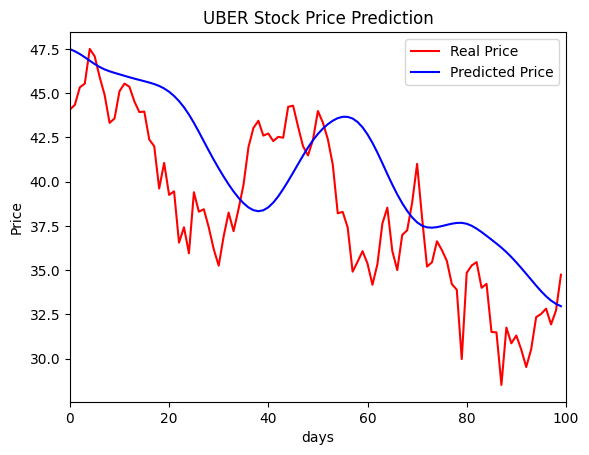

In [16]:
plt.plot(real_stock_price[-100:],color = 'red', label = 'Real Price')
plt.plot(predicted_price[-100:], color = 'blue', label = 'Predicted Price')
plt.title('UBER Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

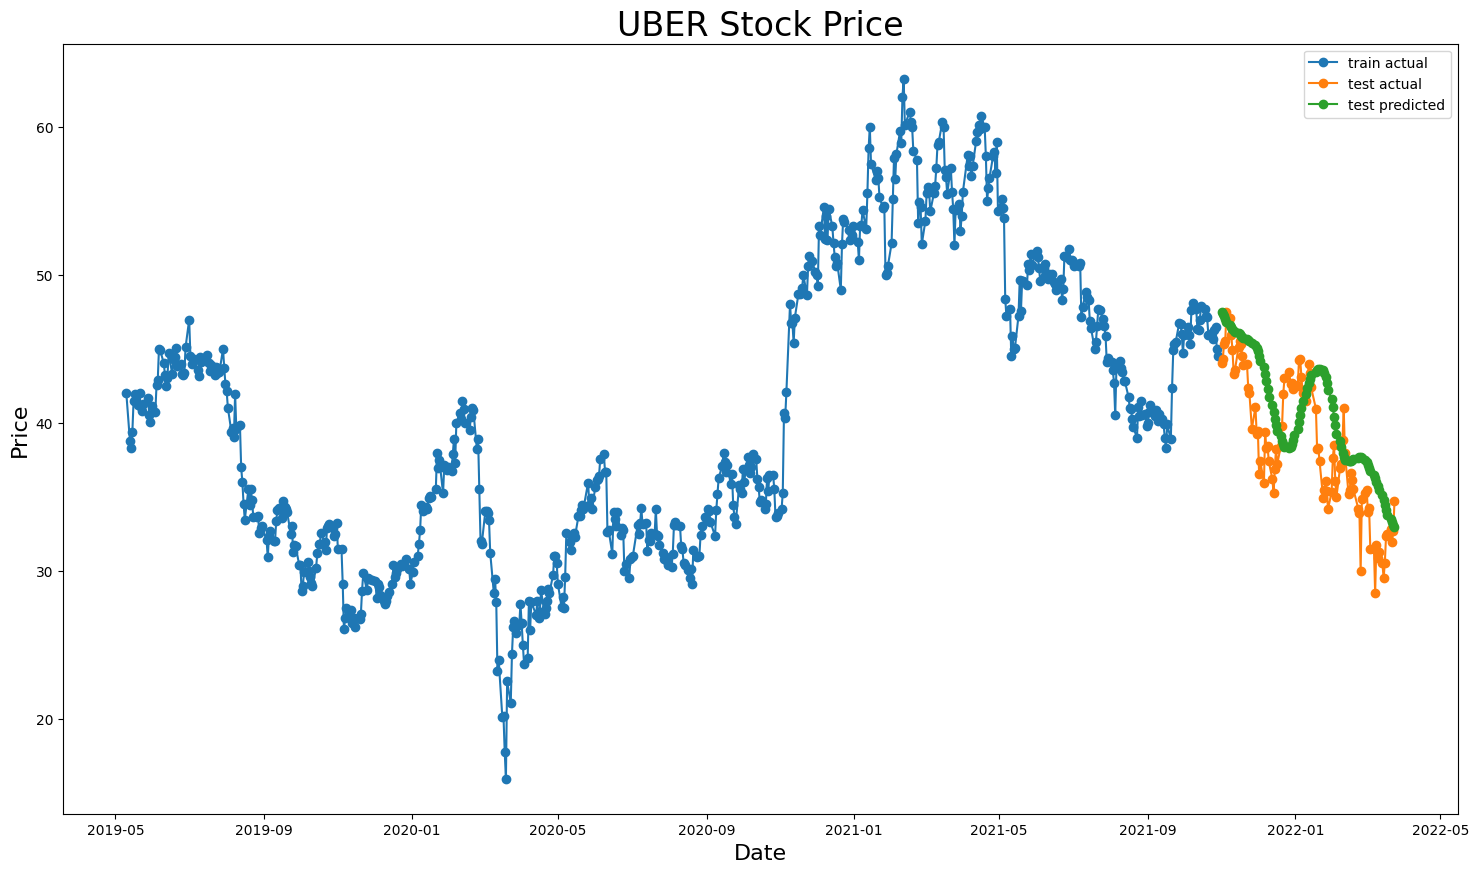

In [17]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],predicted_price[-100:],'-o',label='test predicted')
plt.title('UBER Stock Price',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()

## 2. inputs data is the last 60 data of train data only (not use true test data)

In [18]:
inputs = np.array(trainset[-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [19]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


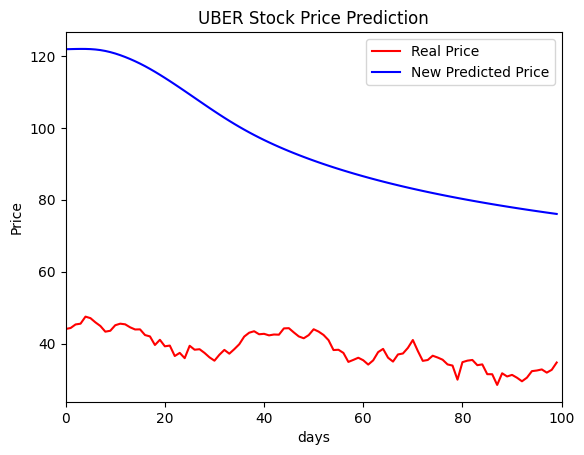

In [20]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'blue', label = 'New Predicted Price')
plt.title('UBER Stock Price Prediction')
plt.xlabel('days')
plt.ylabel('Price')
plt.xlim(0,100)  
plt.legend()
plt.show()

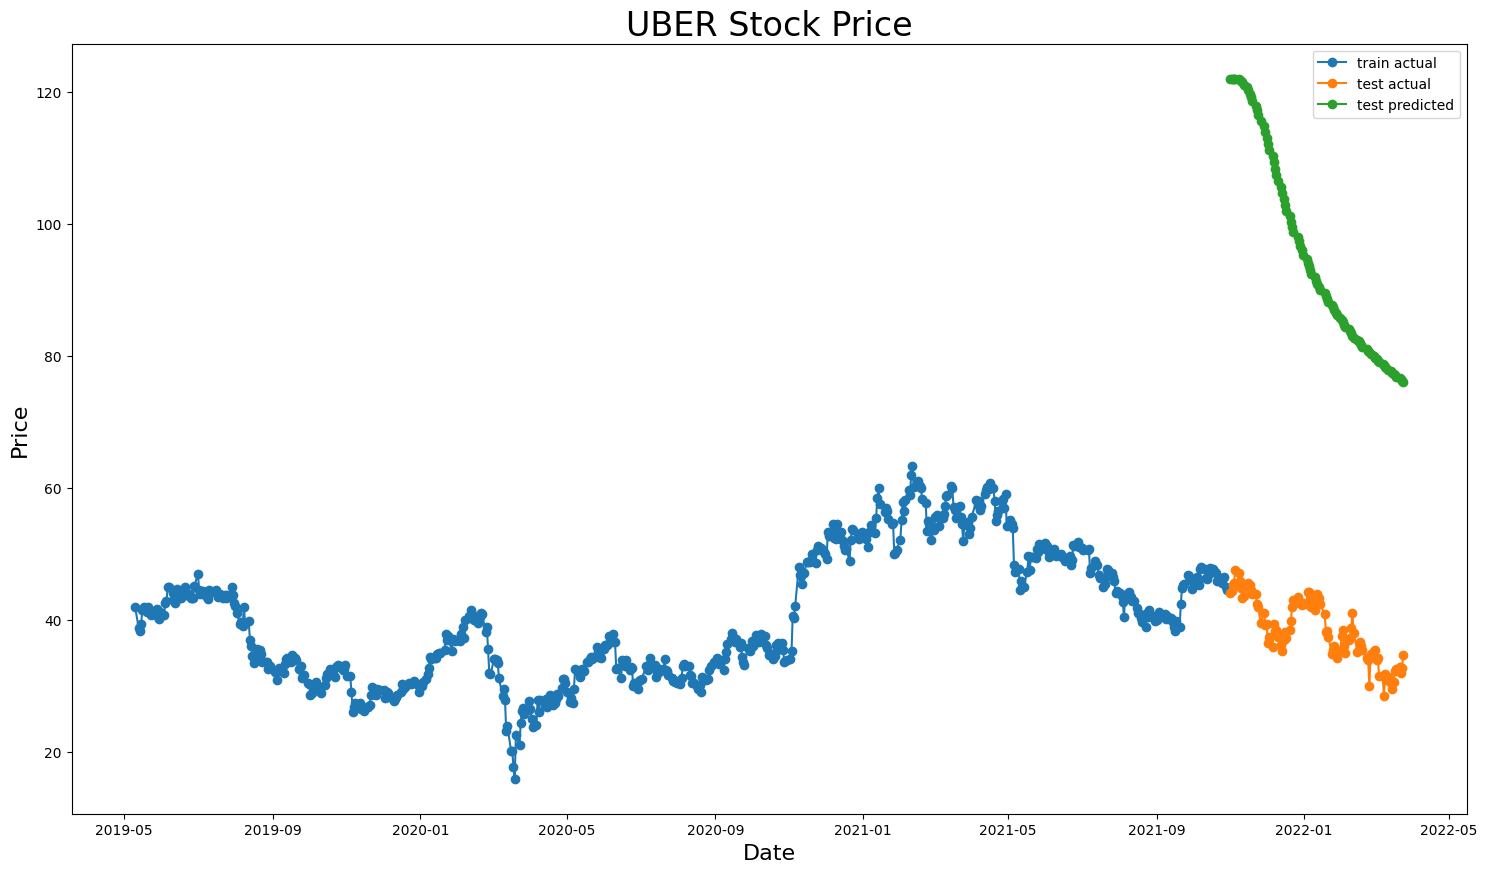

In [21]:
plt.figure(figsize=(18,10))
plt.plot(dataset.iloc[-1000:-100,0],trainset,'-o',label='train actual')
#plt.plot(dataset.iloc[-1000:-100,0],train_pred,'--',label='Prophet')
plt.plot(dataset.iloc[-100:,0],real_stock_price[-100:],'-o',label='test actual')
plt.plot(dataset.iloc[-100:,0],new_predicted_price[-100:],'-o',label='test predicted')
plt.title('UBER Stock Price',size=24)
plt.xlabel('Date',size=16)
plt.ylabel('Price',size=16)
plt.legend()
plt.show()